In [60]:
import numpy as np
from matplotlib import pyplot as plt
import corner

In [10]:
vit_y, vit_p = np.load("vit.npz")["plot_y"], np.load("vit.npz")["predictions"]
resnet_y, resnet_p = np.load("resnet.npz")["plot_y"], np.load("resnet.npz")["predictions"]

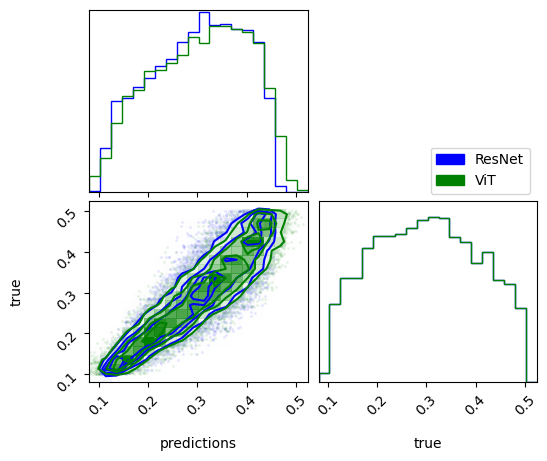

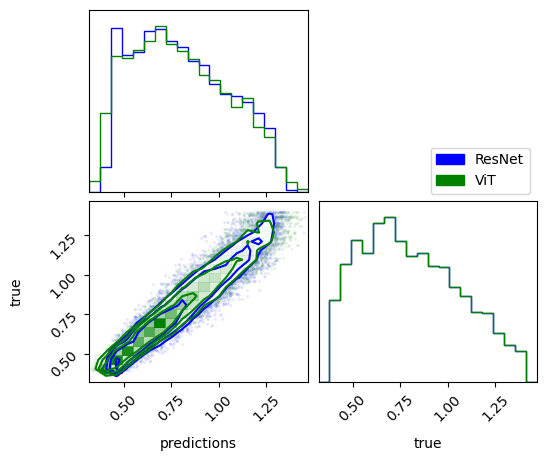

In [61]:
import corner
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

for ind in [0, 1]:
    fig = plt.figure(figsize=(6, 5))
    for color, linelabel, plot_y, predictions in [("blue", "ViT", vit_y, vit_p), ("green", "ResNet", resnet_y, resnet_p)]:
        upp_lims = np.nanmax(plot_y, axis=0)
        low_lims = np.nanmin(plot_y, axis=0)
        corner_range = (low_lims[ind]*0.8, upp_lims[ind]*1.05)
        corner.corner(np.vstack((predictions[:, ind], plot_y[:, ind])).T, labels=[r"predictions", r"true"], \
                      fig=fig, color=color, range=[corner_range, corner_range])
    plt.legend(handles=[mpatches.Patch(color='blue', label=r'ResNet'), mpatches.Patch(color='green', label=r'ViT')], \
                        bbox_to_anchor=(0., 1.0, 1., .0), loc=4)
    plt.show()
    plt.close()

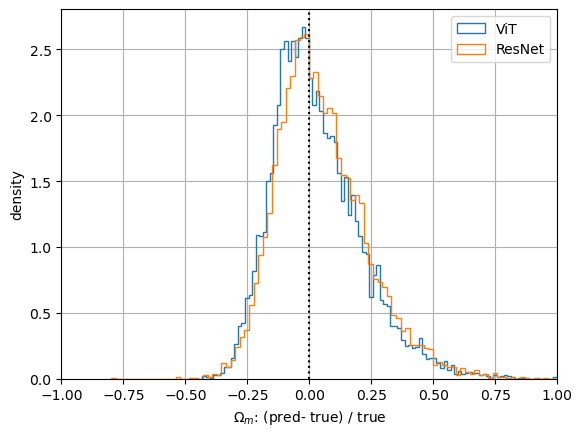

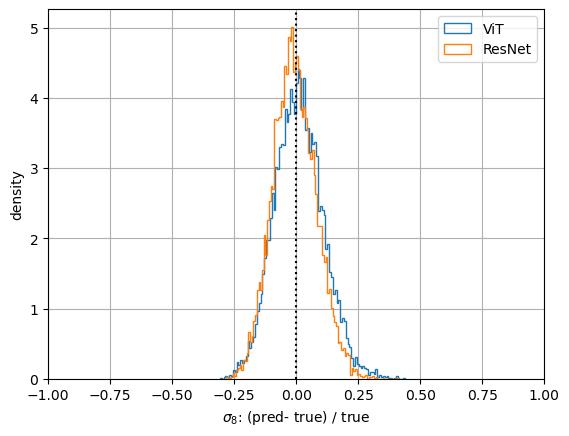

In [58]:
for ind, var in [(0, r"$\Omega_m$"), (1, r"$\sigma_8$")]:
    plt.hist(((vit_p - vit_y) / vit_y)[:, ind], bins=100, density=True, histtype="step", label="ViT")
    plt.hist(((resnet_p - resnet_y) / resnet_y)[:, ind], bins=100, density=True, histtype="step", label="ResNet")
    plt.legend()
    plt.grid()
    plt.axvline(x = 0, color="black", ls=":")
    plt.xlim([-1, 1])
    plt.ylabel("density")
    plt.xlabel(var + r": (pred- true) / true")
    plt.show()
    plt.close()

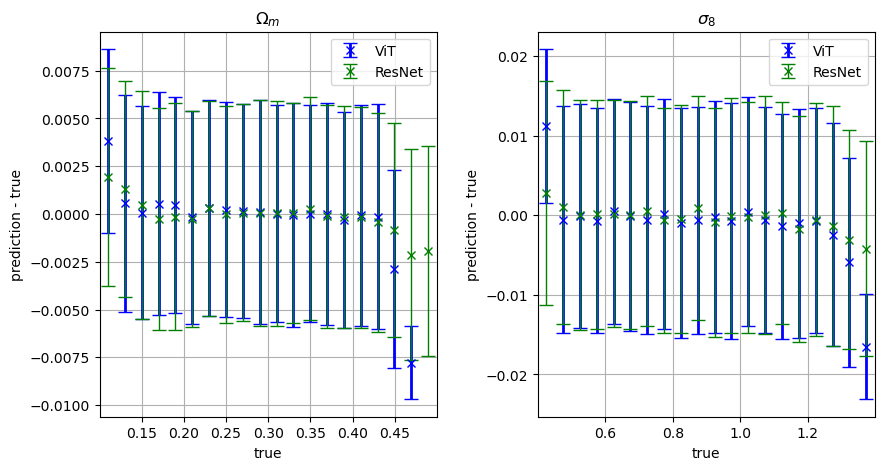

In [78]:
num_bins = 20
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for ind, label, ax in zip([0, 1], [r"$\Omega_m$", r"$\sigma_8$"], axs.ravel()):
    upp_lim = np.nanmax(plot_y[:, ind], axis=0)
    low_lim = np.nanmin(plot_y[:, ind], axis=0)
    ax.set_xlabel("true")
    ax.set_ylabel("prediction - true")
    # ax.plot([low_lim, upp_lim], [low_lim, upp_lim], color="black")
    ax.set_xlim([low_lim, upp_lim])
    # ax.set_ylim([low_lim, upp_lim])
    # ax.set_aspect('equal', adjustable='box')
    ax.set_title(label)
    ax.grid()
    
    for color, linelabel, plot_y, predictions, elinewidth in [("blue", "ViT", vit_y, vit_p, 2), ("green", "ResNet", resnet_y, resnet_p, 1)]:
        _, bin_edges = np.histogram(plot_y[:, ind], bins=num_bins, range=(low_lim, upp_lim))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_means = np.zeros(num_bins)
        bin_stddevs = np.zeros(num_bins)
        for i in range(num_bins):
            bin_indices = np.where((predictions[:, ind] >= bin_edges[i]) & (predictions[:, ind] < bin_edges[i + 1]))
            bin_values = predictions[:, ind][bin_indices]
            bin_means[i] = np.mean(bin_values)
            bin_stddevs[i] = np.std(bin_values)
    # p = np.poly1d(np.polyfit(plot_y[:, ind], predictions[:, ind], 1))
        ax.errorbar(bin_centers, bin_means - bin_centers, yerr=bin_stddevs, fmt="x", alpha=1, label=linelabel, elinewidth=elinewidth, capsize=5, color=color)
    ax.legend()
    
plt.show()
plt.close()

# 